<a href="https://colab.research.google.com/github/LautaroAguila/ProyectoCancelacionHoteles/blob/main/Proyecto_final_Aguilar_Lautaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Como podemos anticipar la cancelacion de una reserva en hoteles?



#Introduccion

En este análisis, utilizaremos técnicas de análisis exploratorio de datos (EDA), preprocesamiento, reducción de dimensionalidad y modelado para predecir si una reserva de hotel se cancelará o no. Esta capacidad es crucial para los hoteles, ya que permite una mejor gestión de recursos y previsión de ingresos.


**Contexto empresarial.**

Las grandes cadenas hoteleras reciben reservas diariamente, pero también enfrentan cancelaciones. Este proyecto tiene como objetivo identificar patrones en las reservas que se cancelan, independientemente del motivo, mediante visualizaciones y análisis.

**Algunas preguntas que nos hacemos.**

1. ¿Se cancelan más las reservas semanales o de fines de semana?
1. ¿Cancelan más las familias con niños o los adultos sin hijos?
1. ¿El tiempo de espera es un factor importante para predecir cancelaciones?
1. ¿Cuál es el mes con más cancelaciones?
1. ¿Cancelan más los clientes que contratan servicios adicionales (almuerzo, desayuno o cena) o los que no?

# Carga de datos


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdirve")

Mounted at /content/gdirve


In [ ]:
path = "/content/gdirve/MyDrive/DATA Coder/"

In [ ]:
df_1 = pd.read_csv(path +'booking.csv', encoding =('ISO-8859-1'),low_memory =False)


In [ ]:
df_2 = pd.read_csv(path +'hotel_bookings.csv', encoding =('ISO-8859-1'),low_memory =False)


# Exploracion de los datos.

### Columnas principales


**Nos enfocaremos en las siguientes columnas de df_1:**

*   number of adults: nos indica la cantidad de adultos que asisitio en esa reserva.
*   number of children: nos indica la cantidad de niños que asisitio en esa reserva.
*   number of weekend nights: nos indica que cantidad de noches de fin de seamana ocupo la reserva.
*   number of week nights: nos indica que cantidad de noches de la seamana ocupo la reserva.
*   lead time: nos indica con cuantos dias de antelacion se realizo la reserva.
*   date of reservation: nos indica el dia en que se realizo la reserva.
*   type of meal: nos indica si con la reserva tambien se adquirio algun tipo de menu o ninguno.
*   is_canceled: esta es nuestra variable a predecir, nos indica si la reserva fue cancelada o no, luego veremos que para indicar que no fue cancelada usaremos el '0' y para indicar que fue cancelada el '1'.

Renombramos y transformamos columnas para facilitar el análisis:

In [ ]:
# Renombrar y transformar columnas
df_1 = df_1.rename(columns={'booking status': 'is_canceled'})
df_1['is_canceled'] = df_1['is_canceled'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [ ]:
# Eliminar columnas no relevantes
df_1 = df_1.drop(columns=["P-C", "P-not-C", "Booking_ID"])

In [ ]:
# Convertir 'date of reservation' a formato datetime
df_1['date of reservation'] = pd.to_datetime(df_1['date of reservation'], errors='coerce')

In [ ]:
df_1['type of meal'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df_1['room type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
df_1['market segment type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
# Crear un diccionario de mapeo
mapeo_type_of_meal = {'Not Selected':0,'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
mapeo_type_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
mapeo_type_market = {'Offline':0,'Online': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4}
# Convertir los valores categóricos a numéricos
df_1['type of meal'] = df_1['type of meal'].map(mapeo_type_of_meal)
df_1['room type'] = df_1['room type'].map(mapeo_type_room)
df_1['market segment type'] = df_1['market segment type'].map(mapeo_type_market)

In [ ]:
df_1 = df_1.rename(columns={'lead time': 'lead_time'})

In [ ]:
# Verificar valores nulos
df_1.isnull().sum()

number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead_time                    0
market segment type          0
repeated                     0
average price                0
special requests             0
date of reservation         37
is_canceled                  0
dtype: int64

In [ ]:
# Eliminar filas con valores nulos en 'date of reservation'
df_1 = df_1.dropna(subset=['date of reservation'])

In [ ]:
display(df_1.isnull().sum())

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead_time                   0
market segment type         0
repeated                    0
average price               0
special requests            0
date of reservation         0
is_canceled                 0
dtype: int64

No hay ningun valor nulo para trabajar.

In [ ]:
df_1.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead_time,market segment type,repeated,average price,special requests,date of reservation,is_canceled
0,1,1,2,5,1,0,1,224,0,0,88.00,0,2015-10-02,0
1,1,0,1,3,0,0,1,5,1,0,106.68,1,2018-11-06,0
2,2,1,1,3,1,0,1,1,1,0,50.00,0,2018-02-28,1
3,1,0,0,2,1,0,1,211,1,0,100.00,1,2017-05-20,1
4,1,0,1,2,0,0,1,48,1,0,77.00,0,2018-04-11,1


# Análisis Exploratorio de Datos (EDA)

## Cantidad de cancelaciones

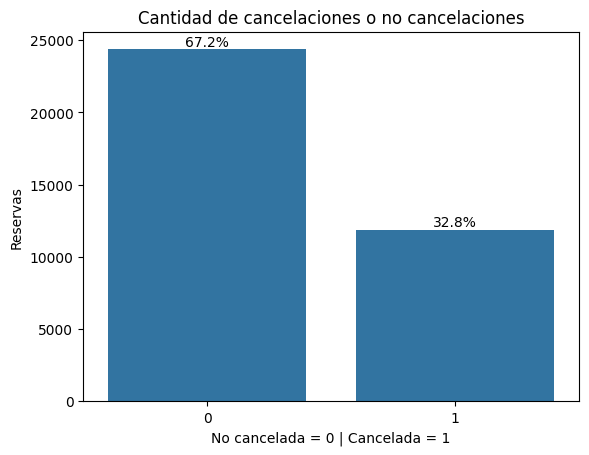

In [ ]:
# Gráfico de barra para cancelaciones
ax = sns.countplot(data=df_1, x="is_canceled")
ax.set_title("Cantidad de cancelaciones o no cancelaciones")
ax.set_ylabel("Reservas")
ax.set_xlabel("No cancelada = 0 | Cancelada = 1")

# Anotar barras con porcentajes
total = df_1['is_canceled'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
plt.show()


## Cancelaciones por mes

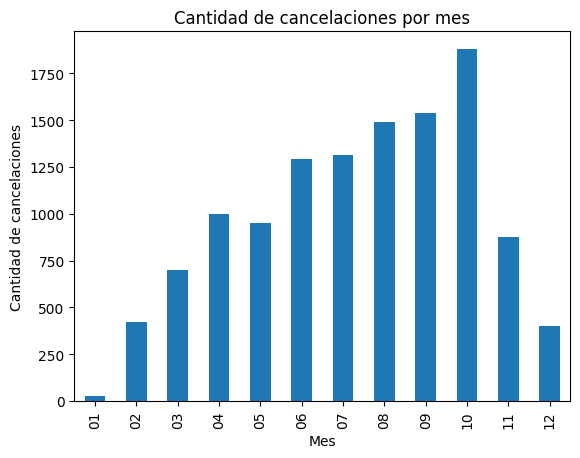

In [ ]:
df_1['mes'] = df_1['date of reservation'].dt.strftime('%m')
conteo_canceled_0_por_mes = df_1[df_1['is_canceled'] == 1].groupby('mes').size()

# Gráfico de barras para cancelaciones por mes
conteo_canceled_0_por_mes.plot(kind='bar')
plt.title('Cantidad de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de cancelaciones')
plt.show()


## Cancelaciones según tiempo de espera

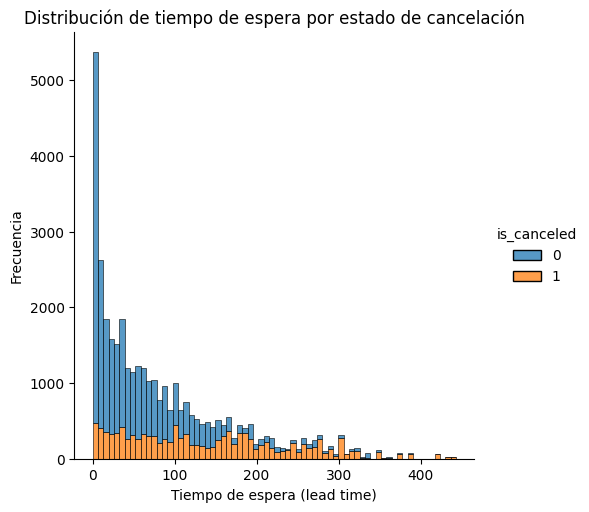

In [ ]:
sns.displot(df_1, x="lead_time", kind="hist", hue='is_canceled', multiple="stack")
plt.title("Distribución de tiempo de espera por estado de cancelación")
plt.xlabel("Tiempo de espera (lead time)")
plt.ylabel("Frecuencia")
plt.show()


## Comparacion de cancelaciones en dias de semana o fin de semana.

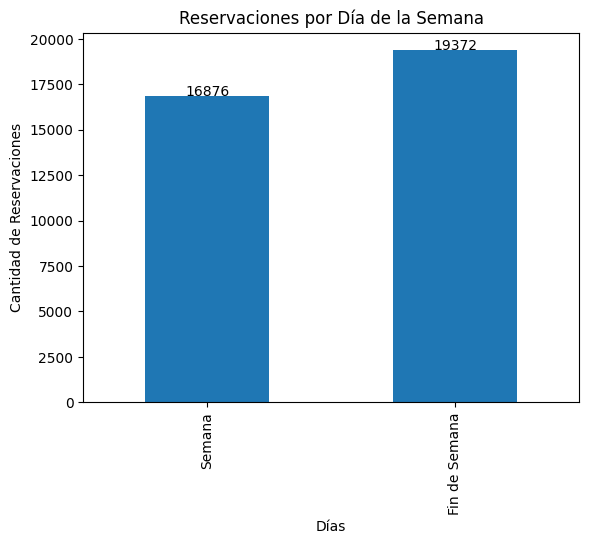

In [ ]:
# Crear una nueva columna que indique si la reserva es para un día de semana o un fin de semana
df_1['weekend'] = (df_1['number of weekend nights'] > 0).astype(int)

# Contar las reservaciones totales por día de semana y fin de semana
reservas_por_dia = df_1.groupby('weekend').size()

# Crear el gráfico de barras
reservas_por_dia.plot(kind='bar')
plt.title('Reservaciones por Día de la Semana')
plt.xlabel('Días')
plt.ylabel('Cantidad de Reservaciones')
plt.xticks([0, 1], ['Semana', 'Fin de Semana'])

# Mostrar las etiquetas de valor en las barras
for i, value in enumerate(reservas_por_dia):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()


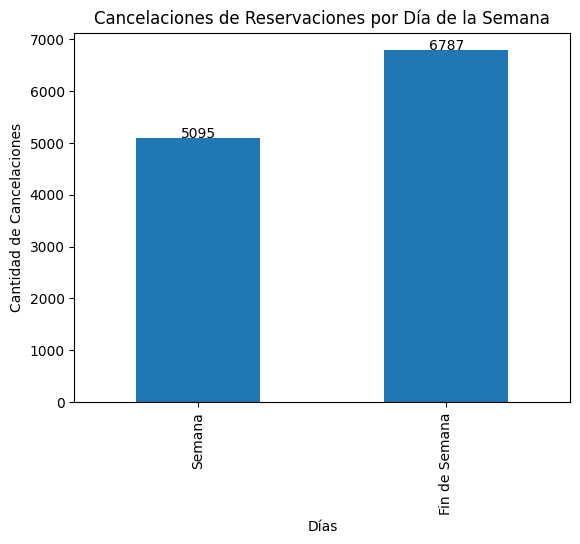

In [ ]:
import matplotlib.pyplot as plt

# Filtrar las reservaciones canceladas por día de semana y fin de semana
cancelaciones_por_dia = df_1[df_1['is_canceled'] == 1].groupby('weekend').size()

# Crear el gráfico de barras
cancelaciones_por_dia.plot(kind='bar')
plt.title('Cancelaciones de Reservaciones por Día de la Semana')
plt.xlabel('Días')
plt.ylabel('Cantidad de Cancelaciones')
plt.xticks([0, 1], ['Semana', 'Fin de Semana'])

# Mostrar las etiquetas de valor en las barras
for i, value in enumerate(cancelaciones_por_dia):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()



## Cancelaciones según número de niños y adultos

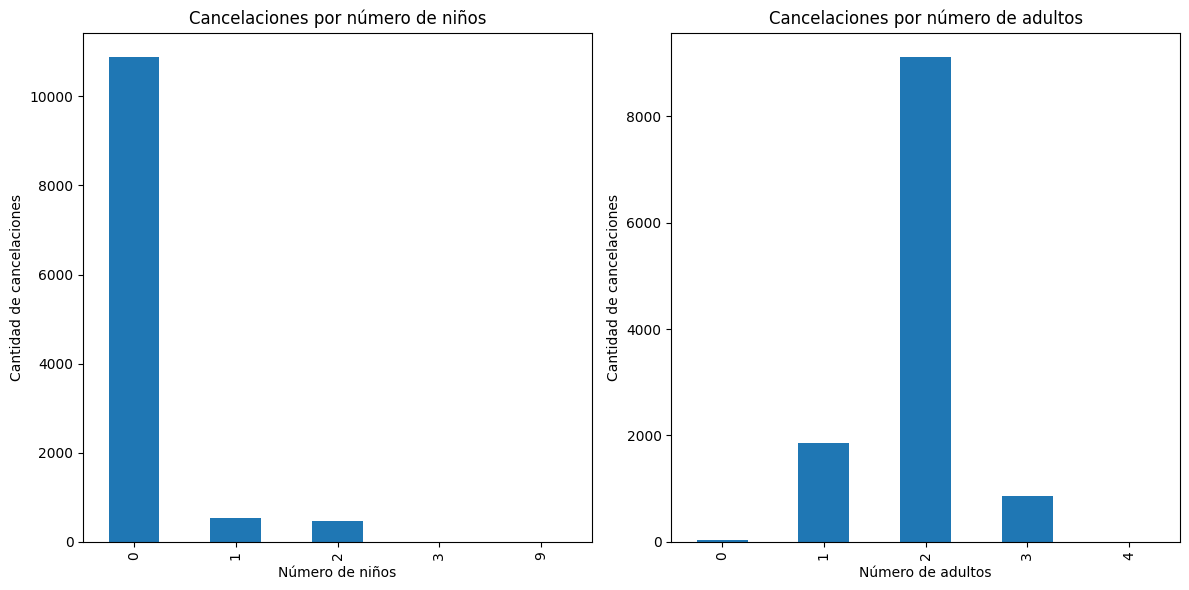

In [ ]:
# Cancelaciones por número de niños
cancelaciones_por_ninos = df_1[df_1['is_canceled'] == 1].groupby('number of children').size()

# Cancelaciones por número de adultos
cancelaciones_por_adultos = df_1[df_1['is_canceled'] == 1].groupby('number of adults').size()

# Crear gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de cancelaciones por número de niños
cancelaciones_por_ninos.plot(kind='bar', ax=axs[0])
axs[0].set_title('Cancelaciones por número de niños')
axs[0].set_xlabel('Número de niños')
axs[0].set_ylabel('Cantidad de cancelaciones')

# Gráfico de cancelaciones por número de adultos
cancelaciones_por_adultos.plot(kind='bar', ax=axs[1])
axs[1].set_title('Cancelaciones por número de adultos')
axs[1].set_xlabel('Número de adultos')
axs[1].set_ylabel('Cantidad de cancelaciones')

plt.tight_layout()
plt.show()


## Relación entre Cancelaciones y Tipo de Comida

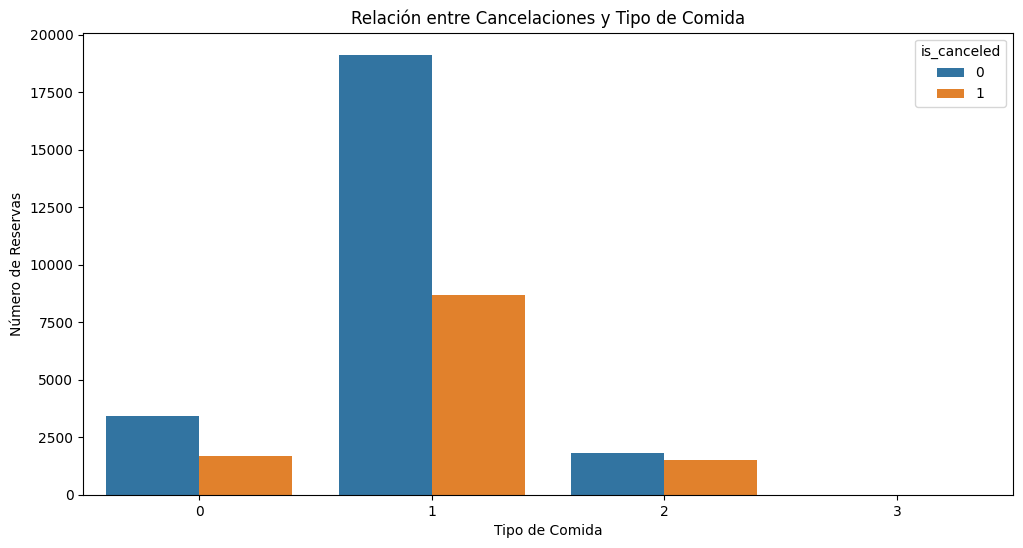

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de conteo
plt.figure(figsize=(12, 6))
sns.countplot(data=df_1, x='type of meal', hue='is_canceled')

# Agregar título y etiquetas
plt.title('Relación entre Cancelaciones y Tipo de Comida')
plt.xlabel('Tipo de Comida')
plt.ylabel('Número de Reservas')

# Mostrar el gráfico
plt.show()

## Conclusión del EDA
A través de estos gráficos, podemos identificar patrones importantes como:

*   Un alto porcentaje de cancelaciones (más del 32%).
*   Octubre es el mes con más cancelaciones.
*   El tiempo de espera es un factor significativo en las cancelaciones.
*   Los adultos que reservan con niños cancelan menos que aquellos que van sin niños.
*   Las reservaciones para fines de semana se cancelan mas que las de la semana, teniendo en cuenta que hay mas reservaciones los fines de semana.

Estos patrones nos ayudan a comprender mejor el comportamiento de las cancelaciones y pueden servir de base para desarrollar modelos predictivos.

# Elección de la Clasificación y PCA

**Justificación de la Clasificación**

La variable objetivo (is_canceled) es binaria y categórica, ya que solo puede tomar dos valores: 0 (no cancelada) o 1 (cancelada). Debido a la naturaleza de esta variable, utilizamos técnicas de clasificación para predecir su valor.

**Algoritmos de Clasificación Utilizados**

1. Regresión Logística:

  * Ventajas: Nos permite entender la relación entre las características y la probabilidad de cancelación.

2. Máquinas de Soporte Vectorial (SVM):

  * Ventajas: Útil para separar las reservas canceladas de las no canceladas cuando las relaciones no son lineales.

3. K-Nearest Neighbors (KNN):

    * Ventajas: Nos permite clasificar las reservas basándose en la similitud con reservas anteriores.

4. Árboles de Decisión:
  
  * Ventajas: Nos ayuda a entender las reglas de decisión que llevan a una cancelación.

5. Random Forest:

  * Ventajas: Nos proporciona un modelo robusto y preciso al combinar múltiples árboles de decisión para mejorar la precisión de la predicción de cancelaciones.

6. Gradient Boosting Machines (GBM):

  * Ventajas: Nos permite capturar relaciones complejas y no lineales en los datos, mejorando la precisión de la predicción de cancelaciones a través de un enfoque iterativo y ajustado.

In [ ]:
# Preprocesamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y objetivo
X = df_1.drop(columns=["is_canceled", "date of reservation"])
y = df_1['is_canceled']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Reducción de Dimensionalidad
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Aumentar el número de componentes
pca = PCA(n_components=13)  # Especifica la cantidad correcta de componentes principales
X_train_pca = pca.fit_transform(X_train)

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada explicada:", pca.explained_variance_ratio_.cumsum())


Varianza explicada por cada componente: [0.1565392  0.13818664 0.12265479 0.08242117 0.07883743 0.0710456
 0.06818452 0.06143706 0.05405705 0.04969038 0.04211271 0.0346607
 0.03184829]
Varianza acumulada explicada: [0.1565392  0.29472584 0.41738063 0.4998018  0.57863922 0.64968482
 0.71786934 0.7793064  0.83336345 0.88305382 0.92516653 0.95982723
 0.99167552]


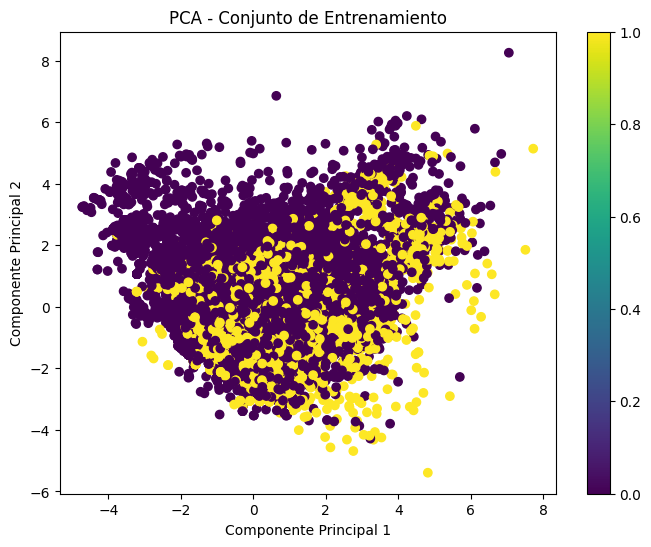

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA a los datos estandarizados
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Conjunto de Entrenamiento')
plt.colorbar()
plt.show()


# Comparamos los distintos algoritmos de clasificacion.

### Imports

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Regresión Logística

In [ ]:


# Entrenar el modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test_pca)

# Evaluar el modelo
print("Regresión Logística")
print(f"Exactitud: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_lr)}\n")



Regresión Logística
Exactitud: 0.79
Precisión: 0.73
Recall: 0.57
F1-score: 0.64
Matriz de Confusión:
[[4374  507]
 [1016 1353]]



### Máquinas de Soporte Vectorial (SVM)

In [ ]:
# Entrenar el modelo
svm = SVC(random_state=42)
svm.fit(X_train_pca, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test_pca)

# Evaluar el modelo
print("Máquinas de Soporte Vectorial")
print(f"Exactitud: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_svm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_svm)}\n")



Máquinas de Soporte Vectorial
Exactitud: 0.84
Precisión: 0.82
Recall: 0.66
F1-score: 0.73
Matriz de Confusión:
[[4539  342]
 [ 804 1565]]



### Gradient Boosting Machines (GBM)

In [ ]:


# Inicializar el clasificador GBM
gbm = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
gbm.fit(X_train_pca, y_train)
y_pred_gbm = gbm.predict(X_test_pca)

# Evaluar el modelo
print("Gradient Boosting Machines")
print(f"Exactitud: {accuracy_score(y_test, y_pred_gbm):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_gbm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_gbm):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_gbm):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_gbm)}\n")

Gradient Boosting Machines
Exactitud: 0.83
Precisión: 0.81
Recall: 0.65
F1-score: 0.72
Matriz de Confusión:
[[4516  365]
 [ 840 1529]]



### K-Nearest Neighbors (KNN)

In [ ]:

# Entrenar el modelo
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_pca)

# Evaluar el modelo
print("K-Nearest Neighbors")
print(f"Exactitud: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_knn)}\n")


K-Nearest Neighbors
Exactitud: 0.85
Precisión: 0.79
Recall: 0.75
F1-score: 0.77
Matriz de Confusión:
[[4407  474]
 [ 592 1777]]



### Árboles de Decisión

In [ ]:

# Entrenar el modelo
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train_pca, y_train)

# Predicciones
y_pred_dt = dt.predict(X_test_pca)

# Evaluar el modelo
print("Árboles de Decisión")
print(f"Exactitud: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_dt)}\n")



Árboles de Decisión
Exactitud: 0.73
Precisión: 0.78
Recall: 0.26
F1-score: 0.39
Matriz de Confusión:
[[4711  170]
 [1758  611]]



### Random Forest

In [ ]:

# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf.fit(X_train_pca, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_rf = rf.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Exactitud del modelo Random Forest:", accuracy_rf)
print(f"Exactitud: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_rf)}\n")


Exactitud del modelo Random Forest: 0.8777931034482759
Exactitud: 0.88
Precisión: 0.84
Recall: 0.77
F1-score: 0.80
Matriz de Confusión:
[[4546  335]
 [ 551 1818]]



### Matrices de confusion.

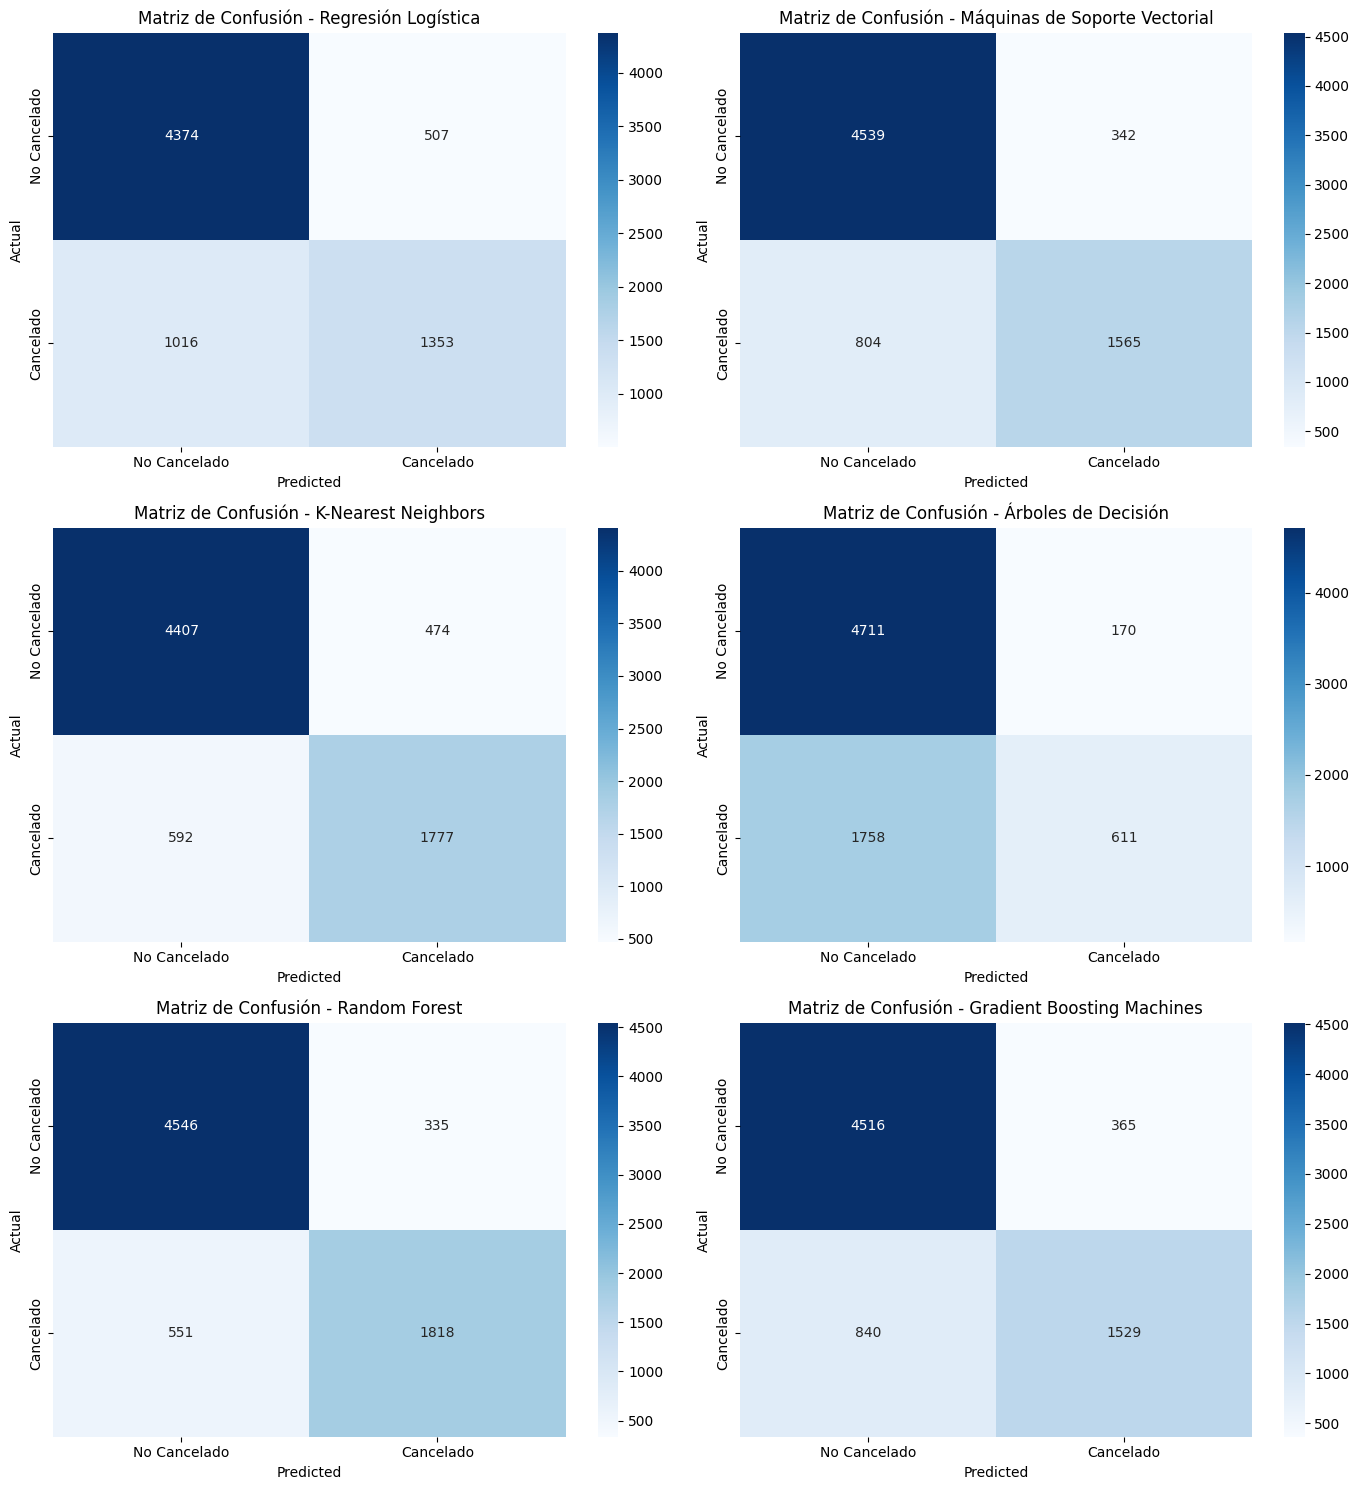

In [ ]:
# Definir la función para graficar la matriz de confusión
def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancelado', 'Cancelado'], yticklabels=['No Cancelado', 'Cancelado'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Matriz de Confusión - {model_name}')

# Crear una figura con varios subplots (3x2)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Regresión Logística
y_pred_lr = lr.predict(X_test_pca)
plot_confusion_matrix(axes[0, 0], y_test, y_pred_lr, 'Regresión Logística')

# Máquinas de Soporte Vectorial (SVM)
y_pred_svm = svm.predict(X_test_pca)
plot_confusion_matrix(axes[0, 1], y_test, y_pred_svm, 'Máquinas de Soporte Vectorial')

# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test_pca)
plot_confusion_matrix(axes[1, 0], y_test, y_pred_knn, 'K-Nearest Neighbors')

# Árboles de Decisión
y_pred_dt = dt.predict(X_test_pca)
plot_confusion_matrix(axes[1, 1], y_test, y_pred_dt, 'Árboles de Decisión')

# Random Forest
y_pred_rf = rf.predict(X_test_pca)
plot_confusion_matrix(axes[2, 0], y_test, y_pred_rf, 'Random Forest')

# Gradient Boosting Machines (GBM)
y_pred_gbm = gbm.predict(X_test_pca)
plot_confusion_matrix(axes[2, 1], y_test, y_pred_gbm, 'Gradient Boosting Machines')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


Con estas matrices podemos ver que,

      | No Cancelado   | Verdader Negativo | Falso Positivo   |
    -----------------------------------------------------------
      | Cancelado      | Falso Negativo    | Verdadero Psitivo|

Vemos que todos los algoritmos tienen valores parecidos en las casillas de VN y VP, pero las casillas que marcan la diferencia son las de FN y FP.

Es muy perjudicial para nuestra prediccion si nuestro modelo es muy propenso a decirnos que una reserva sera cancelada cuando en realidad no, o al contrario que nos diga que una reserva no sera cancelada cuando en ralidad si.


### Conclusion

En base a todas las metricas que vimos: Exactitud, Precisión, Recall, F1-score y Matriz de Confusión podemos decir que el modelo que mejor predice nuestra variable 'is_canceled', es "Random Forest" ya que tiene una exactitud de 88% y una precisión de 84%, ademas su Recall, que indica cuántas de las reservas realmente canceladas fueron identificadas correctamente, es de un 77% siendo este el mas alto de los 6 modelos probados.

# Random Forest


In [ ]:
model = RandomForestClassifier(n_estimators=22)
X = df_1.drop(columns=["is_canceled", "date of reservation"])
y= df_1["is_canceled"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=22)

In [ ]:
fs = model.feature_importances_
feature_names = X.columns

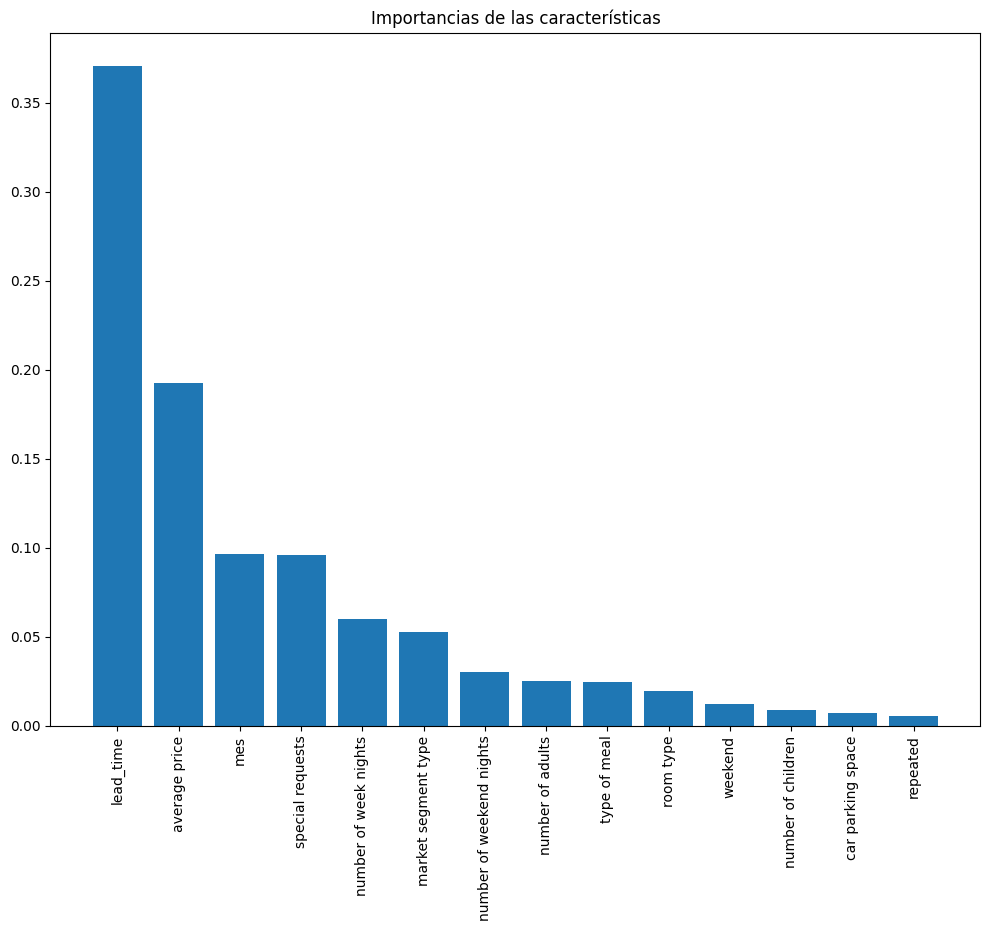

In [ ]:
feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Importancias de las características")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_predicted))

Accuracy: 0.8940689655172414
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7339
           1       0.87      0.79      0.83      3536

    accuracy                           0.89     10875
   macro avg       0.89      0.87      0.88     10875
weighted avg       0.89      0.89      0.89     10875



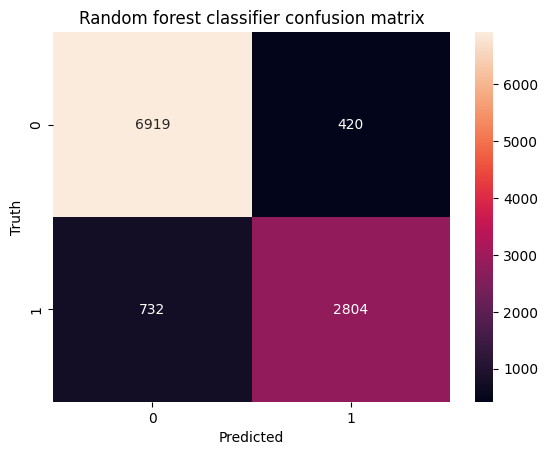

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Random forest classifier confusion matrix")
plt.show()

# Conclusion final


### **¿Qué podemos decir sobre las reservas de los hoteles?**

El análisis detallado de las reservas de hoteles nos ha proporcionado una visión integral sobre los patrones de comportamiento de los clientes y las tendencias de cancelación. A partir de los datos, podemos concluir que:

* Aproximadamente un 32% de las reservas realizadas son canceladas. Este es un porcentaje significativo que resalta la importancia de gestionar adecuadamente las cancelaciones para optimizar la ocupación y los ingresos.

* Las cancelaciones presentan una marcada estacionalidad, con picos en ciertos meses del año. Octubre, por ejemplo, ha sido identificado como el mes con mayor número de cancelaciones. Esto puede estar relacionado con factores estacionales específicos, como cambios climáticos, vacaciones escolares o eventos locales.

* El tiempo de espera o "lead time" es un factor muy importante. Las reservas hechas con mucha antelación tienden a tener una mayor probabilidad de cancelación. Esto significa que los clientes pueden cambiar de planes más fácilmente si la reserva fue hecha con mucha anticipación.

* Las reservas para fines de semana son más probables que se cancelen en comparación con las realizadas para días de semana. Esto podría deberse a que los viajes de fin de semana son más propensos a cambios de último minuto.

*  Las reservas hechas por adultos que no viajan con niños tienen una tasa de cancelación más alta que aquellas realizadas por familias con niños. Esto puede deberse a que los adultos sin niños tienen más flexibilidad para cambiar sus planes de viaje.

* Los clientes que no seleccionan servicios adicionales como almuerzo, desayuno o cena tienden a cancelar más sus reservas. Esto puede indicar una menor inversión inicial en la reserva, haciendo que la cancelación sea una opción menos costosa para el cliente.


En resumen, las cancelaciones de reservas hoteleras están influenciadas por una combinación de factores que incluyen el tiempo de espera, el tipo de cliente, la estacionalidad y la naturaleza de la reserva (fin de semana vs. entre semana). Al comprender estos patrones, los hoteles pueden implementar estrategias más efectivas para minimizar las cancelaciones y optimizar la ocupación, como políticas de cancelación más estrictas para reservas anticipadas, promociones específicas para reservas de último minuto, y ofertas adicionales para reservas familiares.

Este análisis proporciona una base sólida para desarrollar modelos predictivos y estrategias comerciales que pueden ayudar a los hoteles a gestionar mejor sus recursos y maximizar sus ingresos.
